In [4]:
"""
Refer to page 10-12.

We will apply the SVD approximation to an n x m image.
Remember, the rank notes the number of unique columns in the SVD.

It is therefore logical that the less unique columns or rows there are,
that is to say, the lower the rank, the more rows or columns are linear
combinations of each other. As such, a lower rank matrix has fewer singular
values, defined in the approximation in 1-2-matrix-approximation.md summed together.
Therefore, it is smaller and more compressed.

For more on rank, linear dependence and singular values see:
https://www.mathsisfun.com/algebra/matrix-rank.html
"""

import os

import matplotlib.pyplot as plt
from matplotlib.image import imread

import numpy as np


# Pathing
os.chdir("/home/shaun/code/data-driven-ml-textbook")

plt.rcParams["figure.figsize"] = [16, 8]

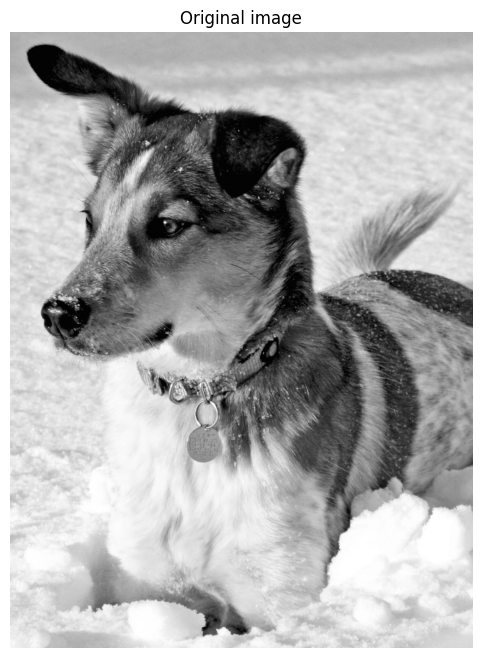

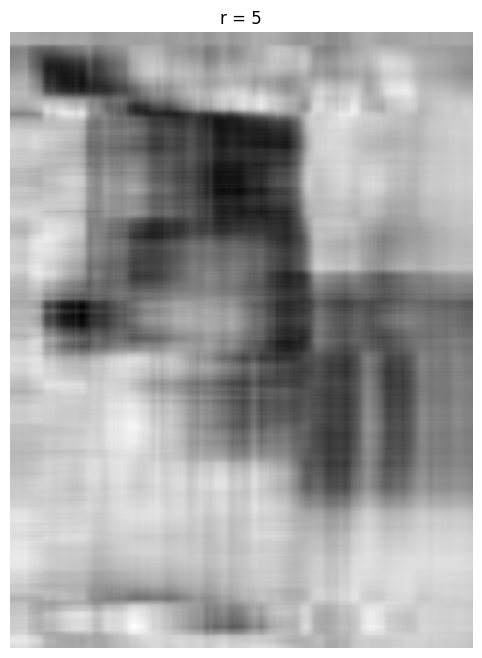

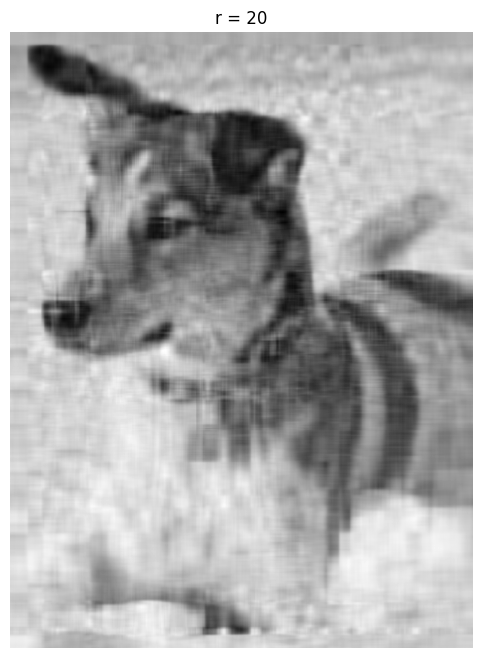

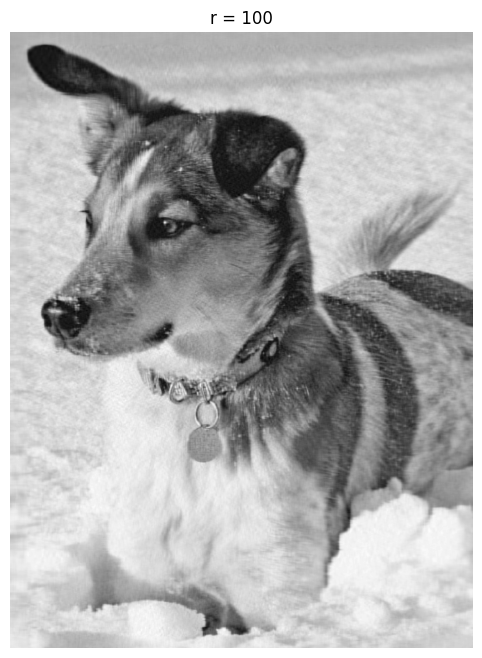

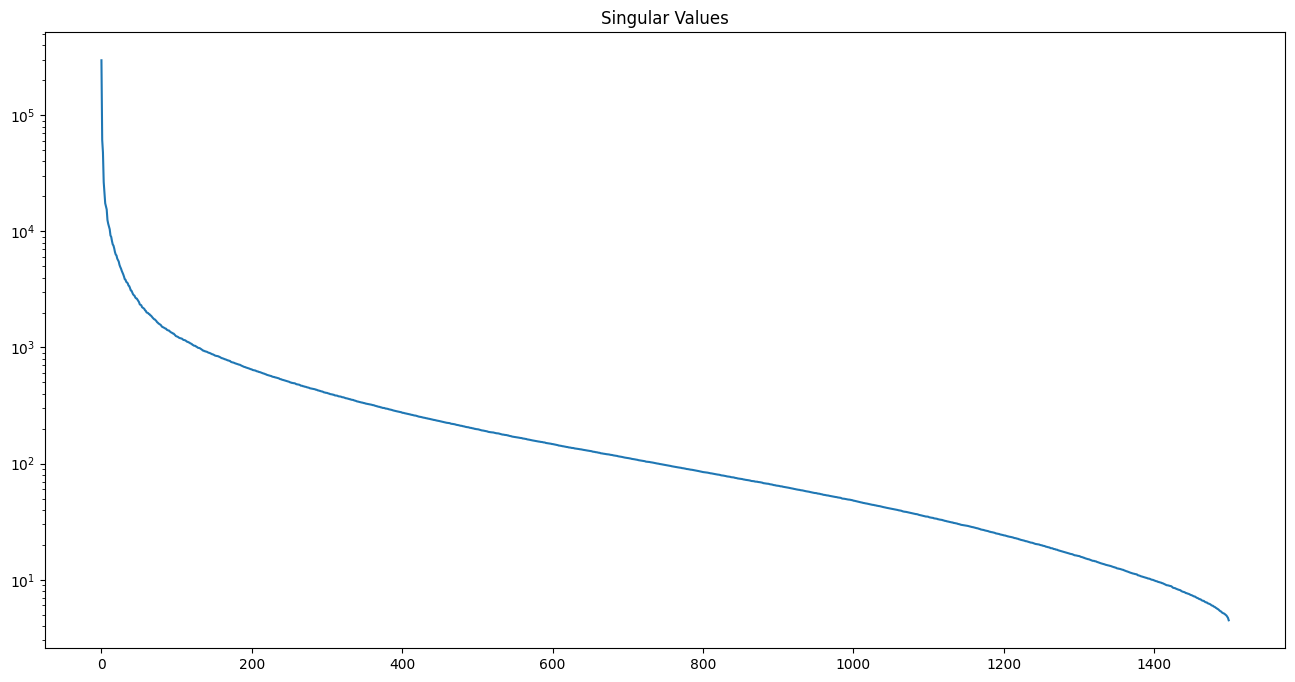

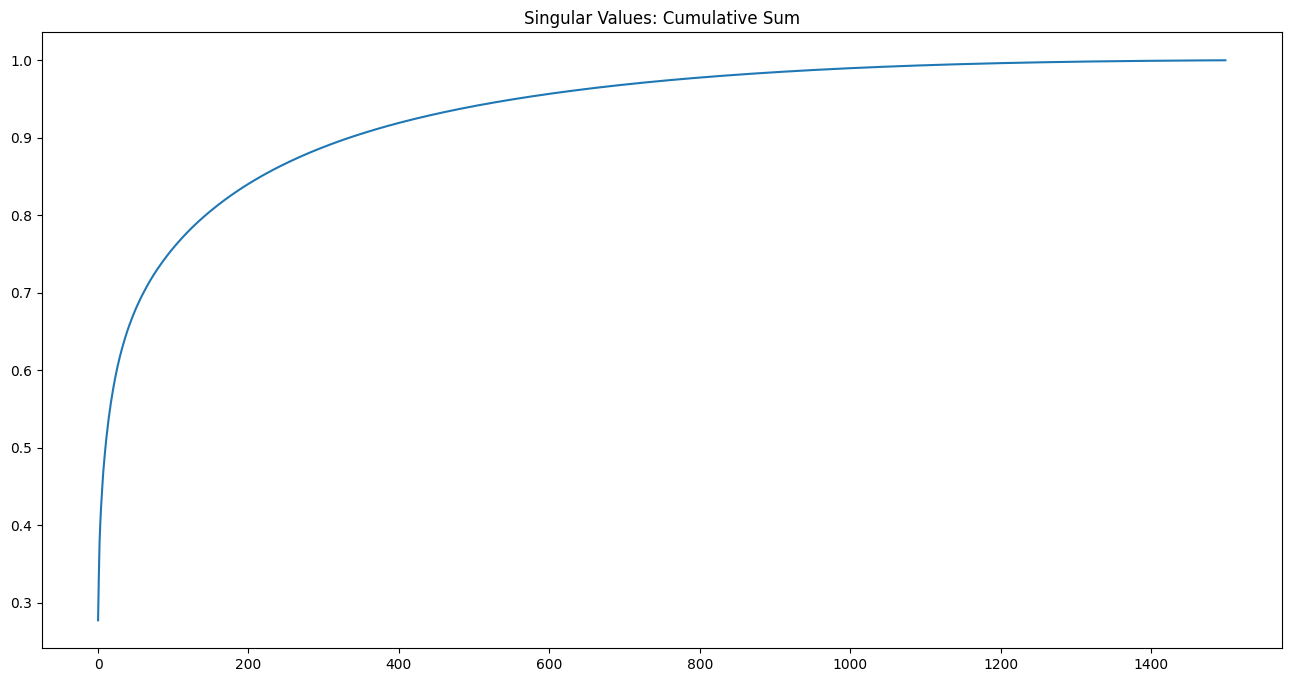

In [5]:
A = imread(os.path.join("DATA_PYTHON", "DATA", "dog.jpg"))
X = np.mean(A, -1)
# Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap("gray")
plt.axis("off")
plt.title("Original image")
plt.show()


U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    # Note the @ operator denotes matrix multiplication.
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    plt.figure(j + 1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap("gray")
    plt.axis("off")
    plt.title("r = " + str(r))
    plt.show()


plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()